In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 第十一週：作業二 (乳癌數據庫-分類)

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
breast_cancer=load_breast_cancer()

In [4]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [49]:
breast_cancer_data=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
breast_cancer_data['WDBC']=breast_cancer.target
breast_cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,WDBC
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [50]:
x=breast_cancer.data
y=breast_cancer.target

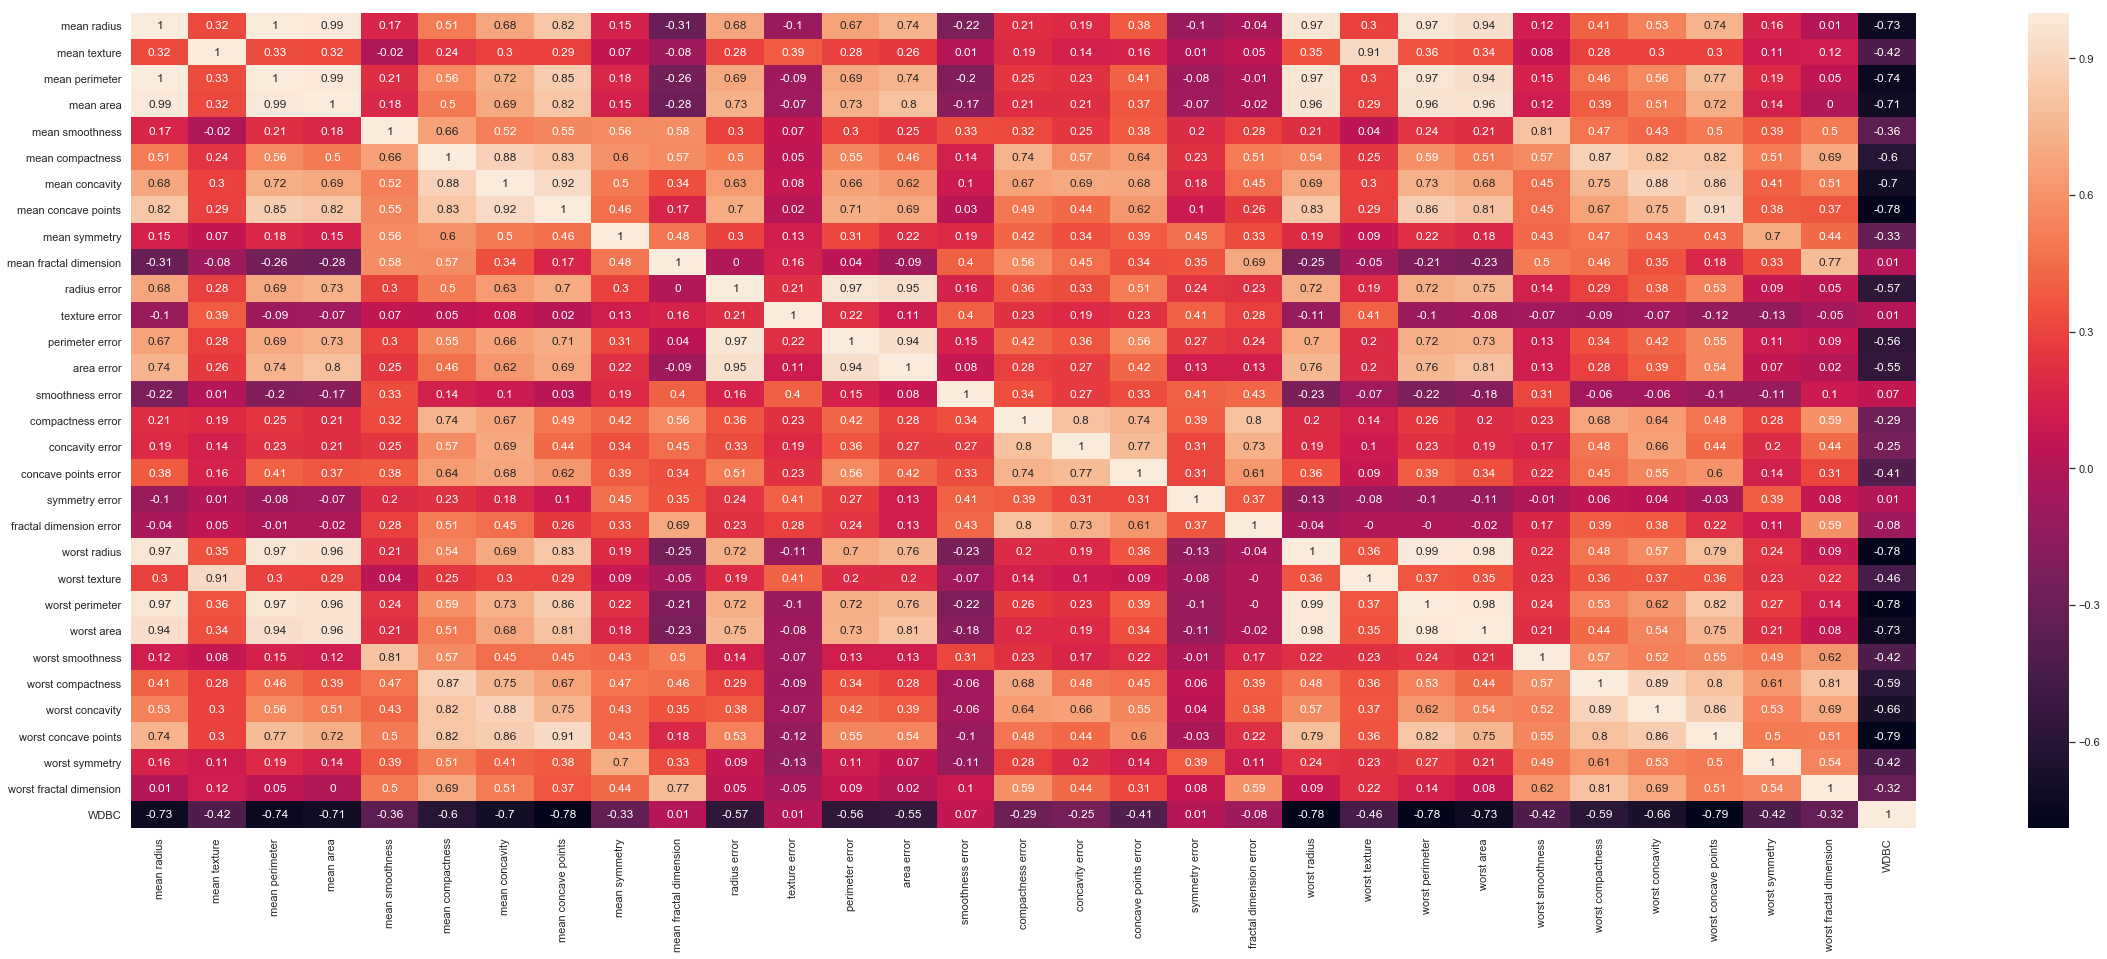

In [51]:
correlation_matrix=breast_cancer_data.corr().round(2)
sns.set(rc={'figure.figsize':(40,15)})
sns.heatmap(correlation_matrix,annot=True)

In [52]:
#從相關係數觀察，worst concave points和WDBC的相關係數是最大的-0.79，再來是worst perimeter跟mean concave points，和WDBC的相關係數都是-0.78

### 先取worst concave points和worst perimeter來分類WDBC

In [53]:
X1=x[:,[22,27]]
Y=y

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y,
                                              test_size=0.2,
                                              random_state=0)

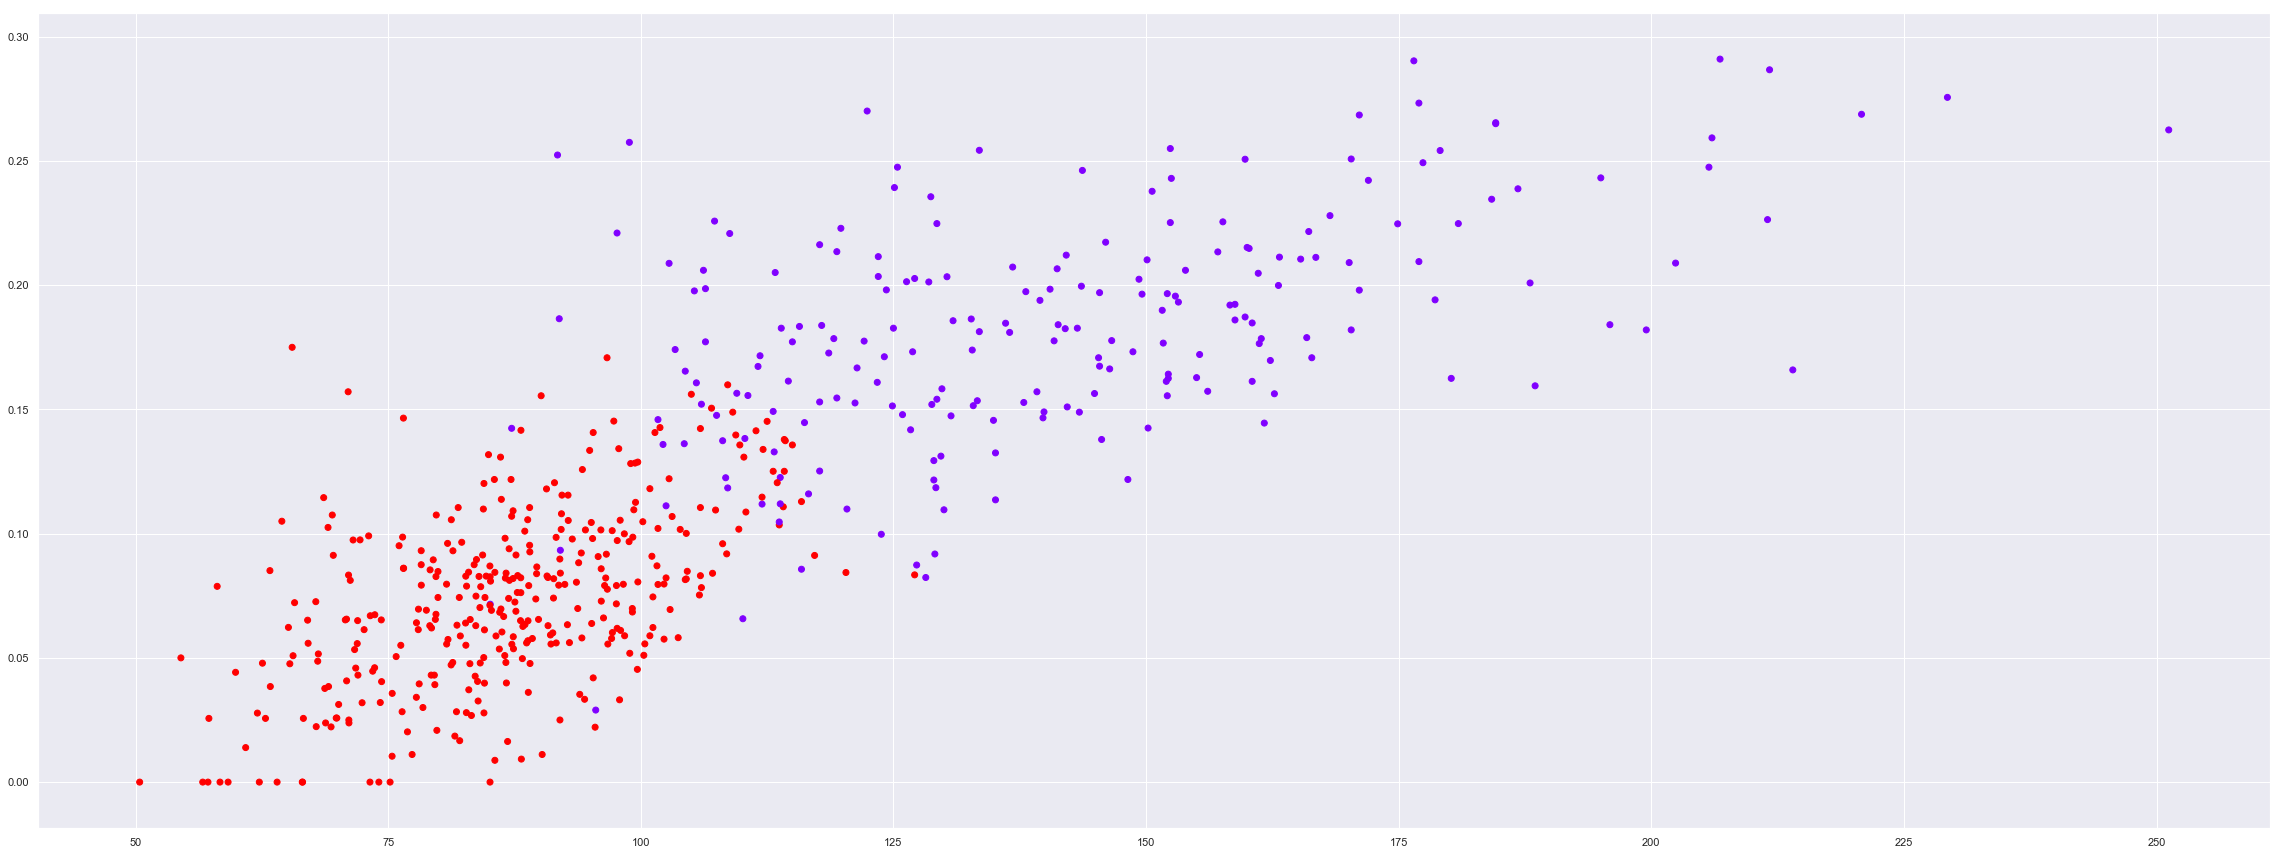

In [56]:
plt.scatter(X1[:,0],X1[:,1],c=Y,cmap='rainbow')

In [57]:
#看起來重疊的地方不多，分類結果可能會不錯

In [58]:
from sklearn.svm import SVC

In [59]:
clf=SVC(gamma='auto')

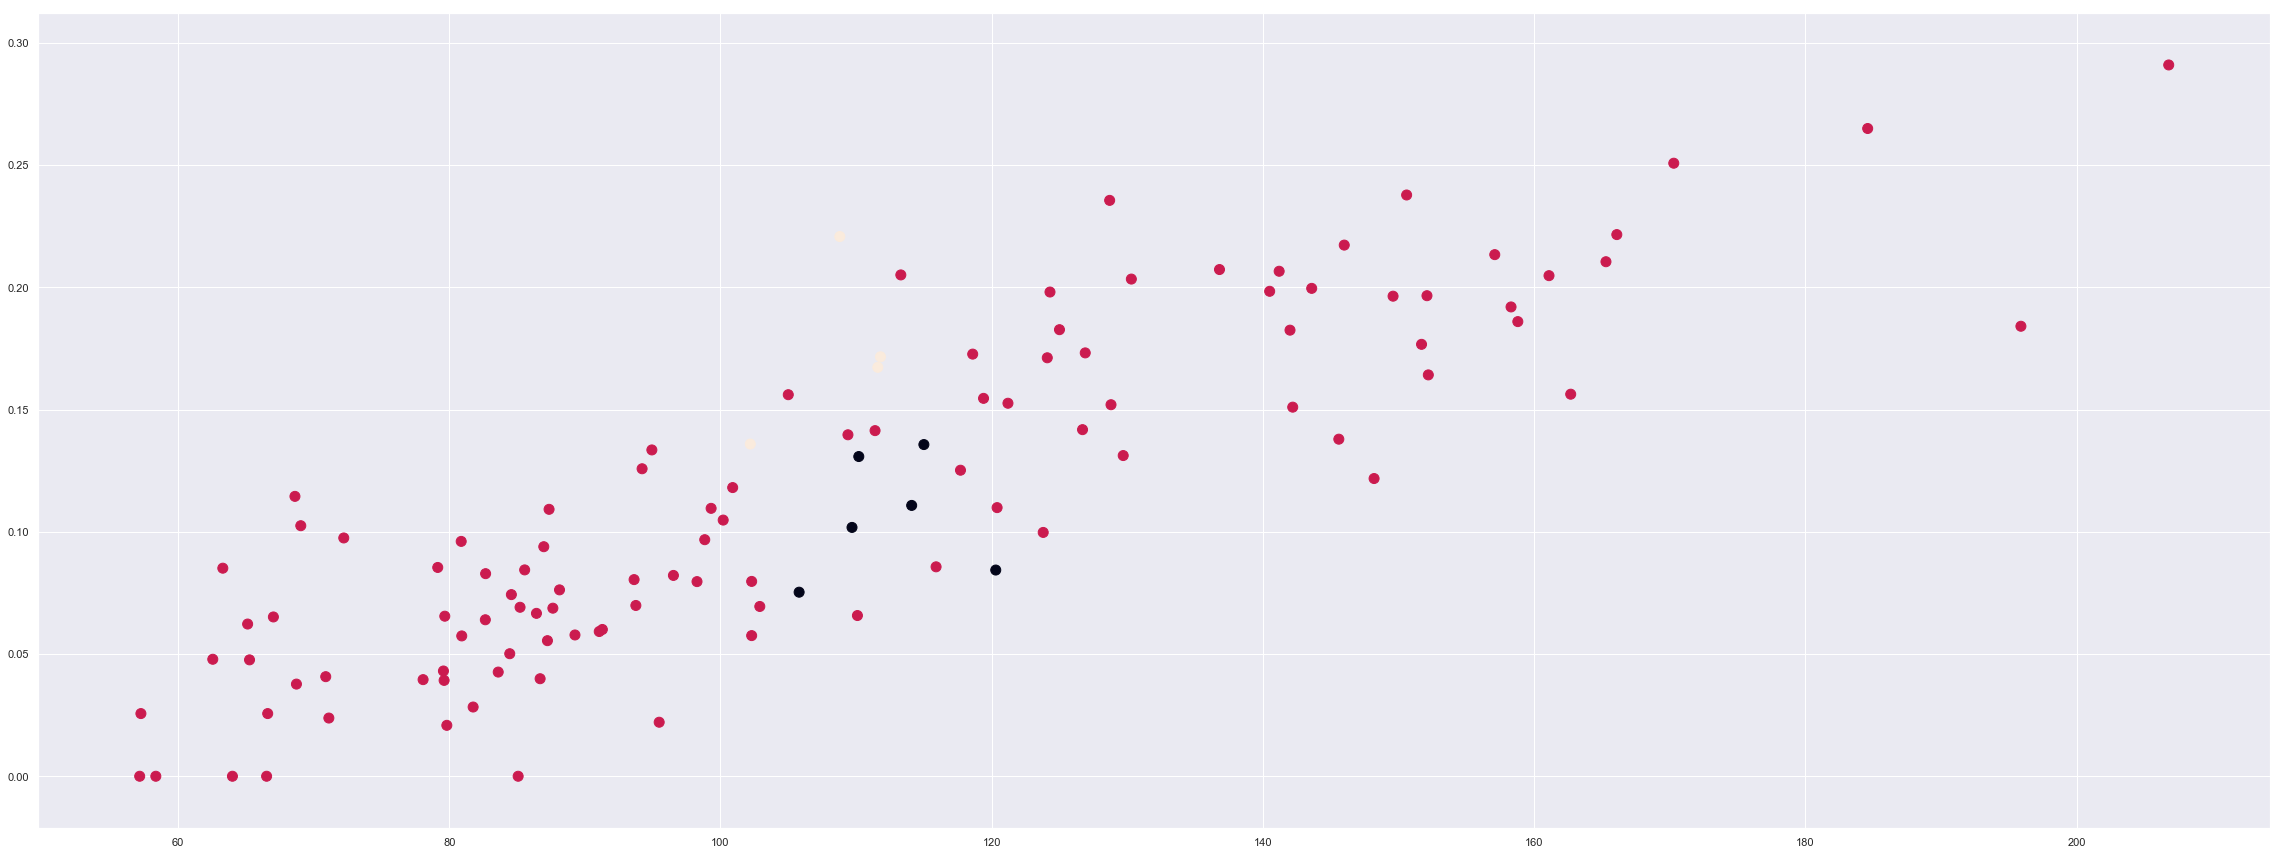

In [60]:
clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)
plt.scatter(x_test[:,0],x_test[:,1],c=y_predict-y_test,s=100)

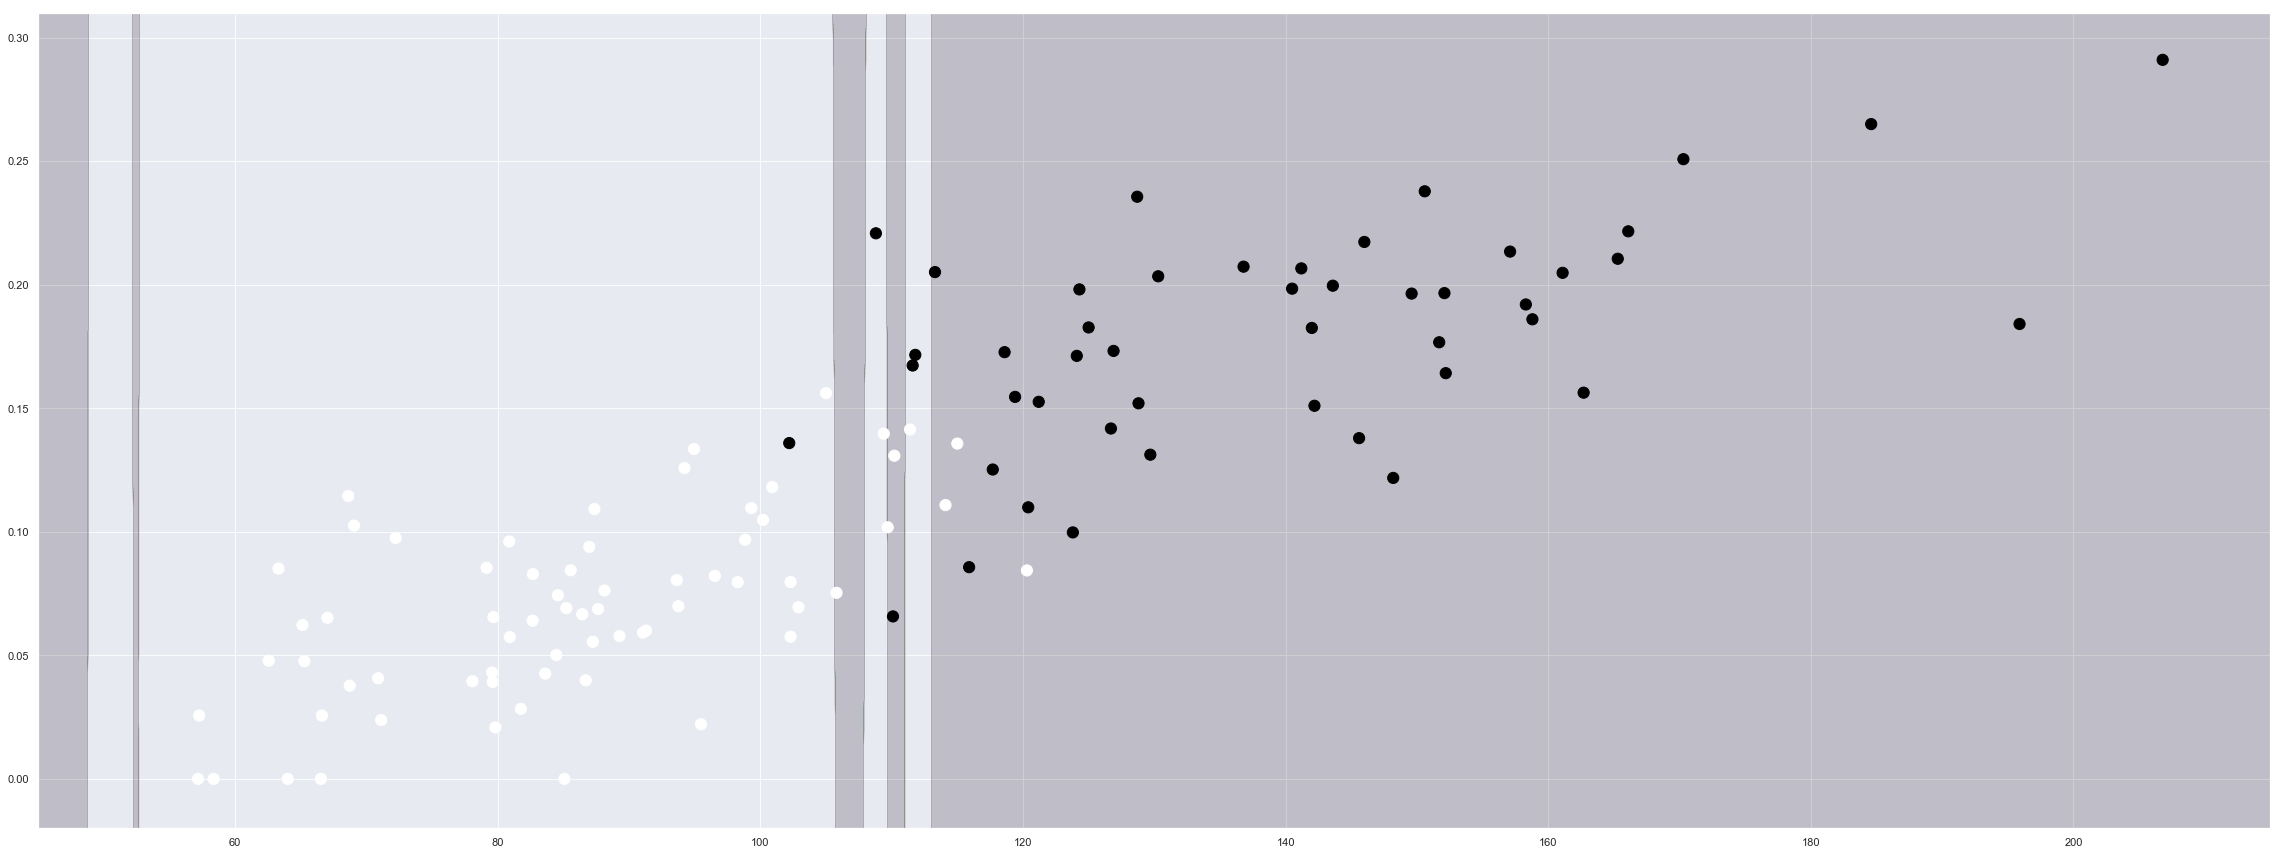

In [61]:
x0=np.arange(45,215,0.01)
y0=np.arange(-0.02,0.32,0.01)

x1,x2=np.meshgrid(x0,y0)
A=np.c_[x1.ravel(),x2.ravel()]
b=clf.predict(A)
B=b.reshape(x1.shape)

plt.contourf(x1,x2,B,cmap='cubehelix',alpha=0.2)

plt.scatter(x_test[:,0],x_test[:,1],cmap='cubehelix',c=y_test,s=125)

In [62]:
#看起來分錯的點比較集中在中間，但分類效果感覺還可以

### 再取worst concave points和mean concave points來預測WDBC

In [63]:
X2=x[:,[7,27]]
Y=y

In [64]:
x_train,x_test,y_train,y_test=train_test_split(X2,Y,
                                              test_size=0.2,
                                              random_state=0)

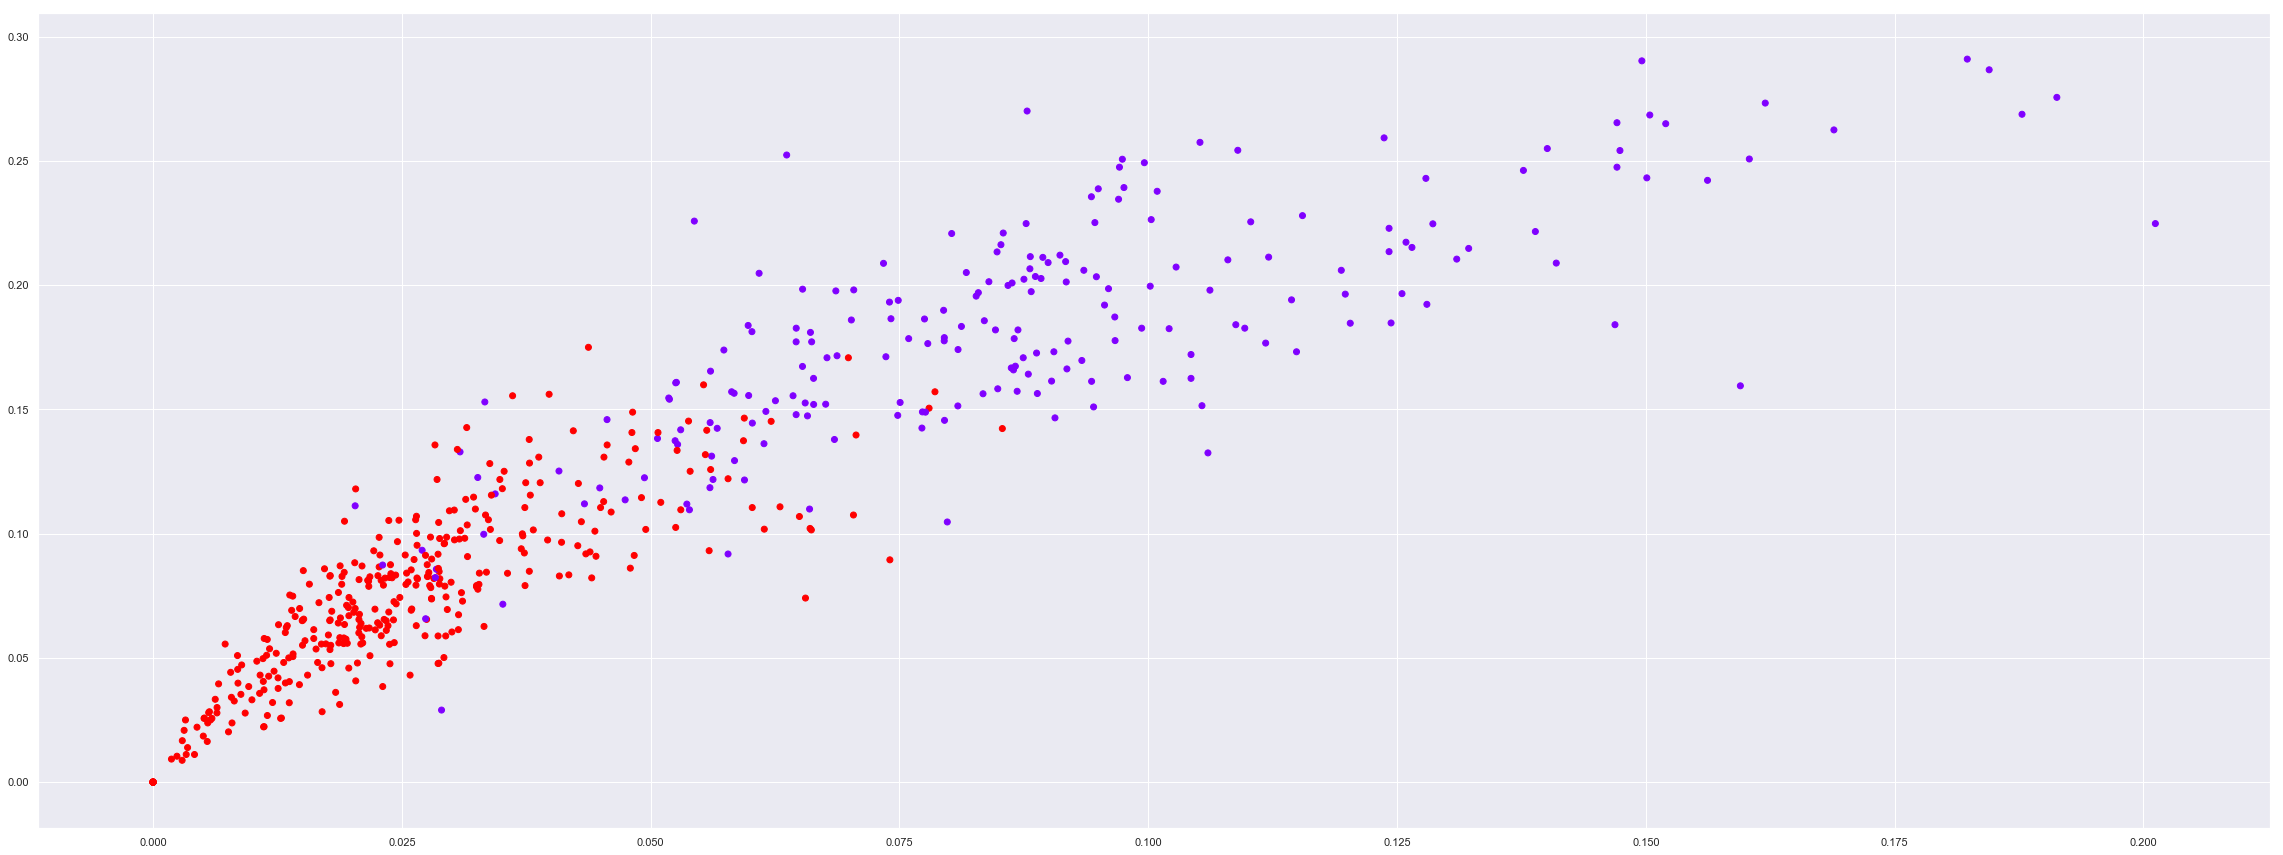

In [65]:
plt.scatter(X2[:,0],X2[:,1],c=Y,cmap='rainbow')

In [66]:
#兩種類別中間重疊的部分似乎比前一次多了一點

In [67]:
clf=SVC(gamma='auto')

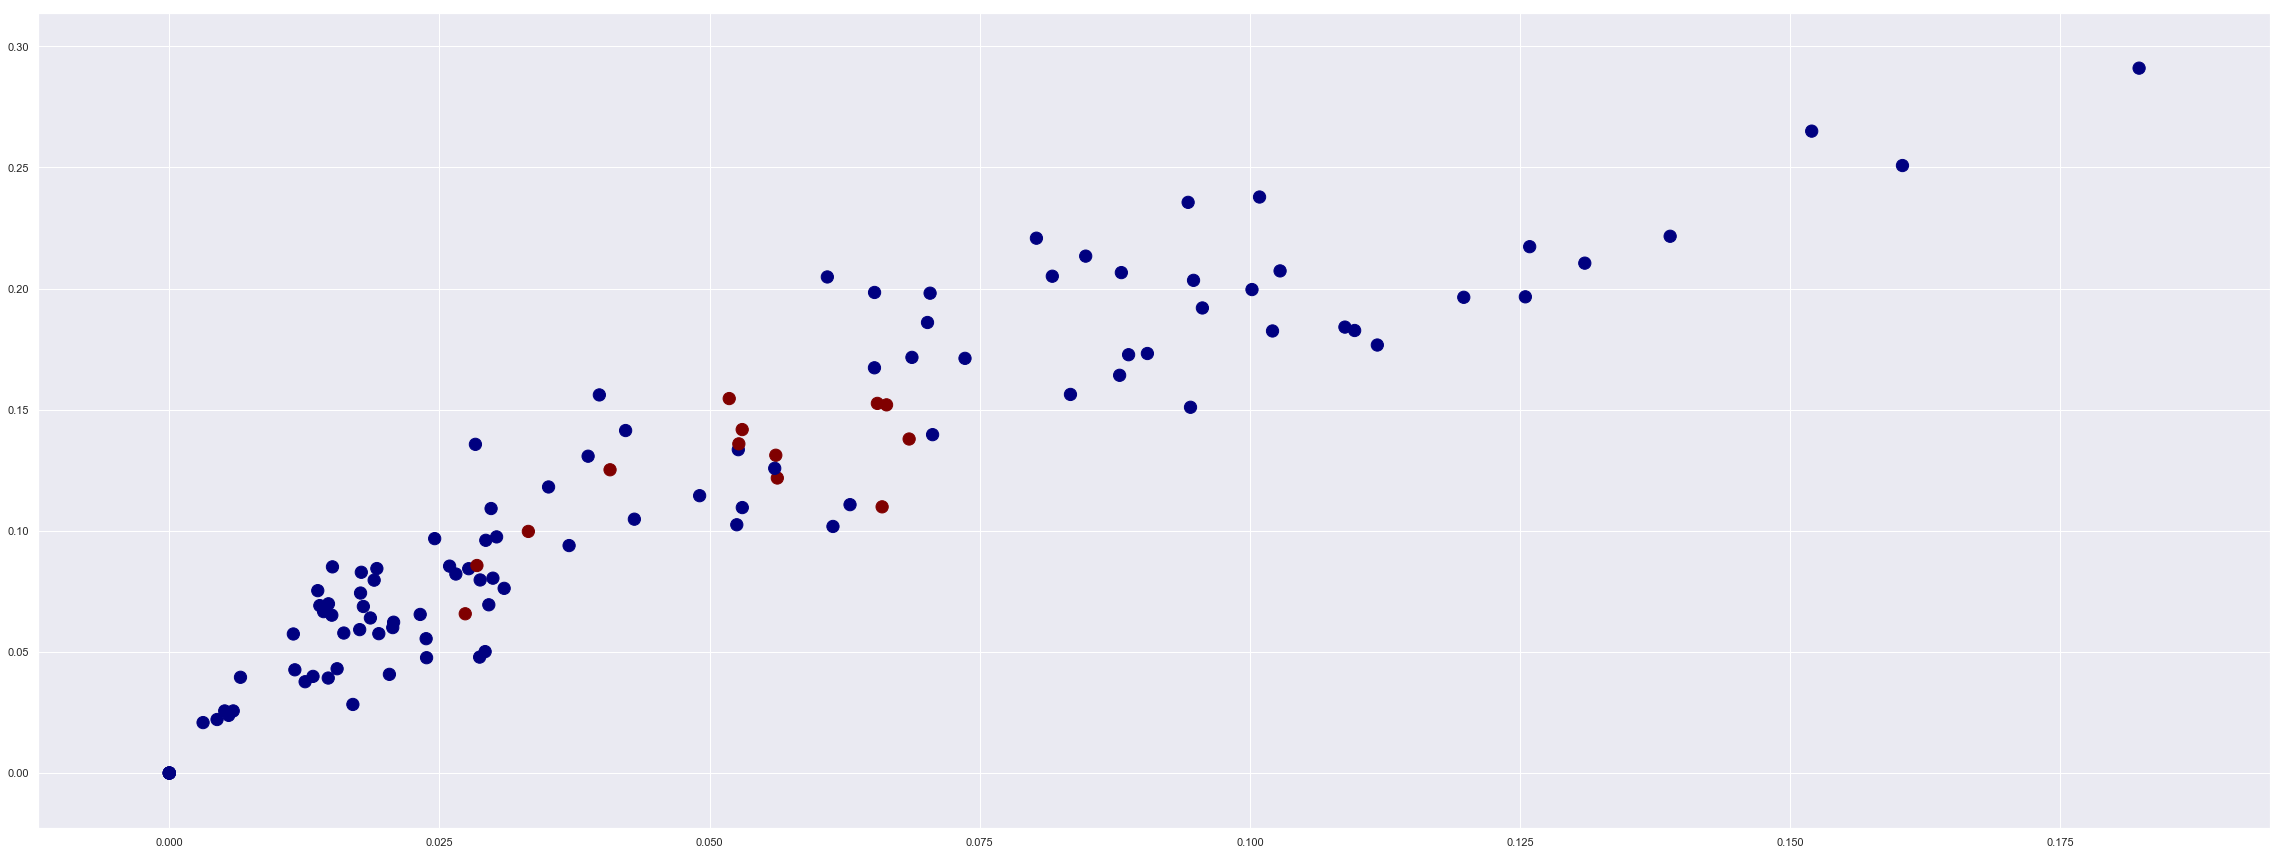

In [68]:
clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)
plt.scatter(x_test[:,0],x_test[:,1],c=y_predict-y_test,s=150,cmap='jet')

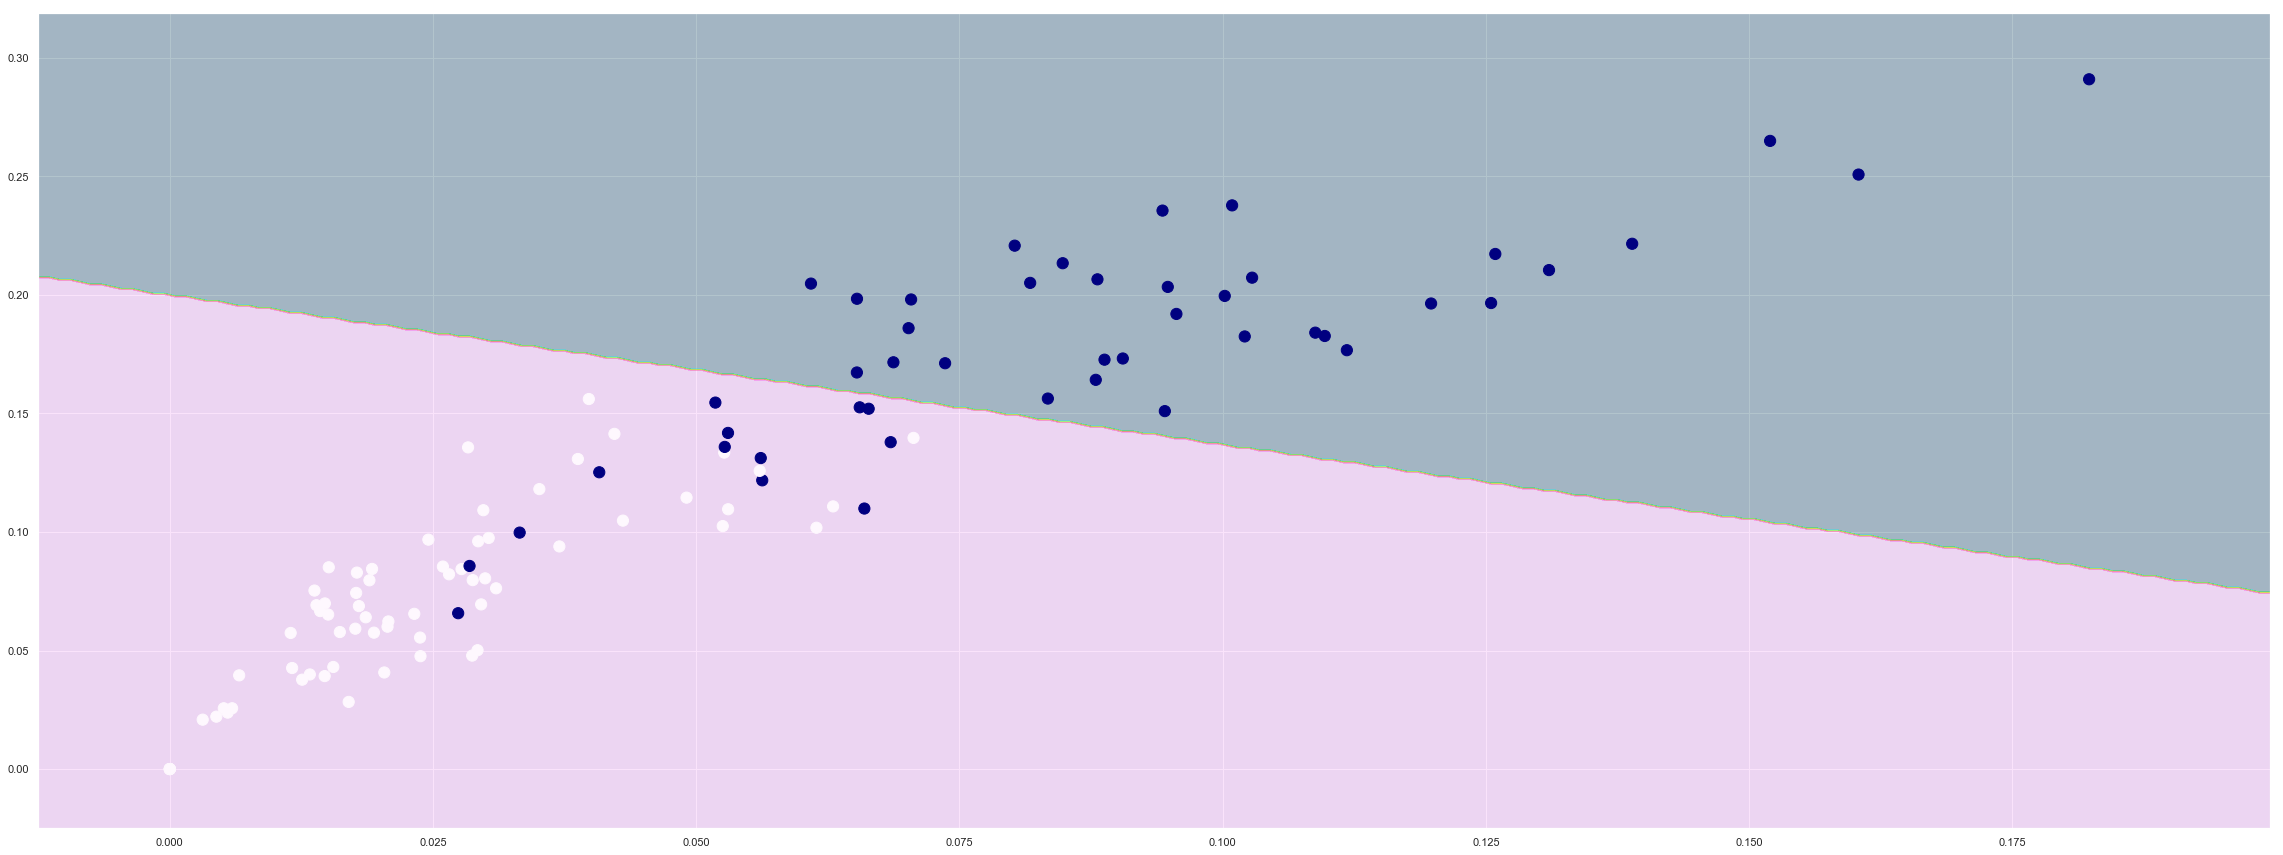

In [69]:
x0=np.arange(-0.0125,0.2,0.001)
y0=np.arange(-0.025,0.32,0.001)

x1,x2=np.meshgrid(x0,y0)
A=np.c_[x1.ravel(),x2.ravel()]
b=clf.predict(A)
B=b.reshape(x1.shape)

plt.contourf(x1,x2,B,cmap='gist_ncar',alpha=0.3)

plt.scatter(x_test[:,0],x_test[:,1],cmap='gist_ncar',c=y_test,s=125)

In [71]:
#看起來藍色的點分錯的比例還蠻高的，雖然相關係數都相同，但前一次取的兩種變數的分類效果較好